# **Поиск минимального остовного дерева (алгоритм Прима)**

## Теория

***Взвешенный граф*** – это граф, каждому ребру которого поставлено некоторое значение, называемое весом.

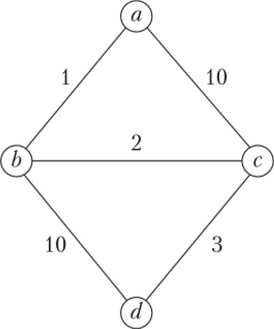



---


**Что же является минимальным остовным деревом? И как вообще граф связан с деревом?**

Разберемся.


---



Граф является ***деревом*** тогда и только тогда, когда любые две различные его вершины можно соединить единственной простой цепью.
***Дерево***, вообще, – это связный граф, не содержащий циклов.


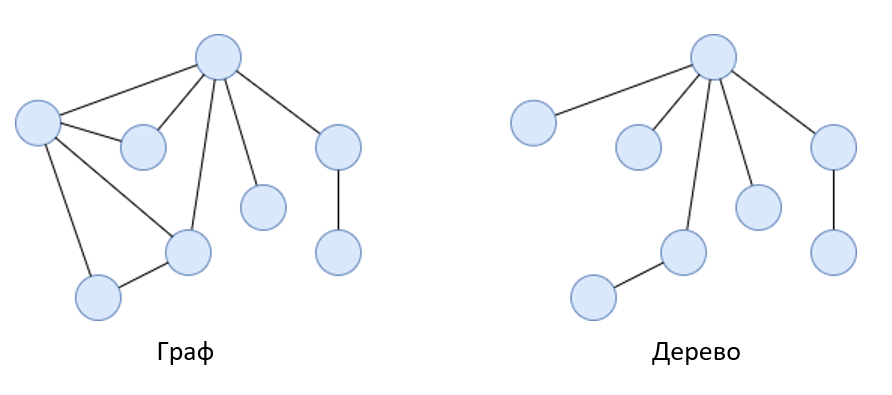



---


С этим разобрались, идем дальше. Теперь нужно понять, что такое остовные деревья, и для чего они применяются.


---


***Остовным деревом*** (spanning tree) связного графа G=(V,E) называется подмножество ребер множества E, которые создают дерево, содержащее все вершины V. 


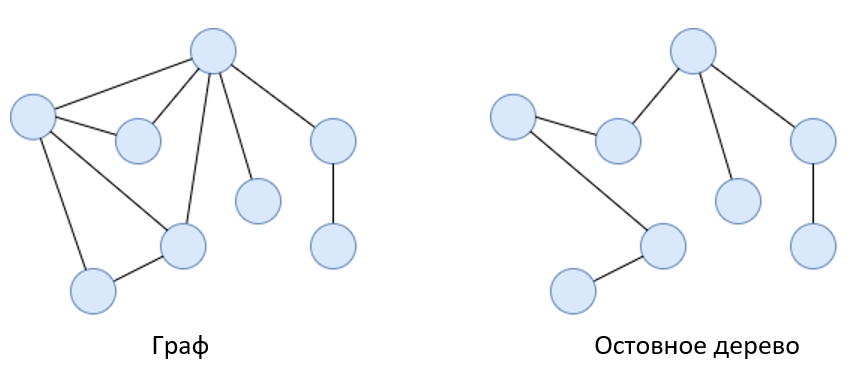

В случае взвешенных графов особый интерес представляют минимальные остовные деревья, то есть остовные деревья с минимальной суммой весов ребер.

***Минимальные остовные деревья*** позволяют решить задачу, в которой требуется соединить множество точек (представляющих, например, города, дома и другие объекты) наименьшим объемом дорожного полотна, проводов, труб и прочее.

Любое дерево и так является возможным связным графом с наименьшим количеством ребер, но минимальное остовное дерево является наименьшим связным графом по весу ребер.


## Алгоритм Прима

***Алгоритм Прима*** для построения минимального остовного дерева (применим для неориентированных графов) начинает обход с одной вершины и создает дерево, добавляя по одному ребру, пока не будут включены все вершины. 

Алгоритм Прима является жадным. Это значит, что на каждом этапе выбирается лучшее локальное решение из всех возможных вариантов, не принимая во внимание глобальную структуру. 



---


**Идея алгоритма Прима:**

1. Выберите минимальное остовное дерево со случайно выбранной вершиной.
2. Найдите все ребра, соединяющие дерево с новыми вершинами, найдите минимум и добавьте его в дерево.
3. Продолжайте повторять шаг 2, пока мы не получите минимальное остовное дерево.



---





## Примеры
R = список ребер графа (длина, вершина 1, вершина 2)

**Красным** выделены узлы и ребра, входящие в остов.

**Желтым** выделены узлы и ребра, которые рассматриваются на текущей итерации и являются претендентами на вхождение в остов. 


---
<br/>

### Пример 1
R = [(9999999999, -1, -1), (5, 1, 2), (3, 1, 3), (4, 2, 3)]

Ответ: [(3, 1, 3), (4, 2, 3)]
(Cost = 7)



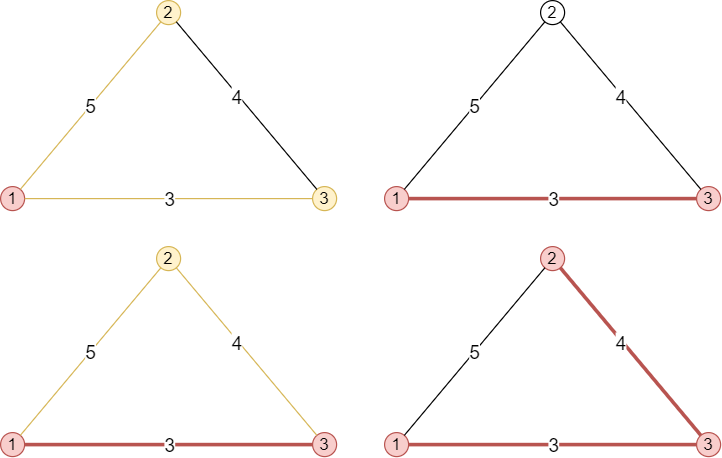


---
<br/>

### Пример 2

R = [(9999999999, -1, -1), (4, 1, 2), (7, 1, 4), (10, 2, 3), (8, 2, 5), (9, 3, 5), (5, 4, 5)]

Ответ: [(4, 1, 2), (7, 1, 4), (5, 4, 5), (9, 3, 5)] (Cost = 25)



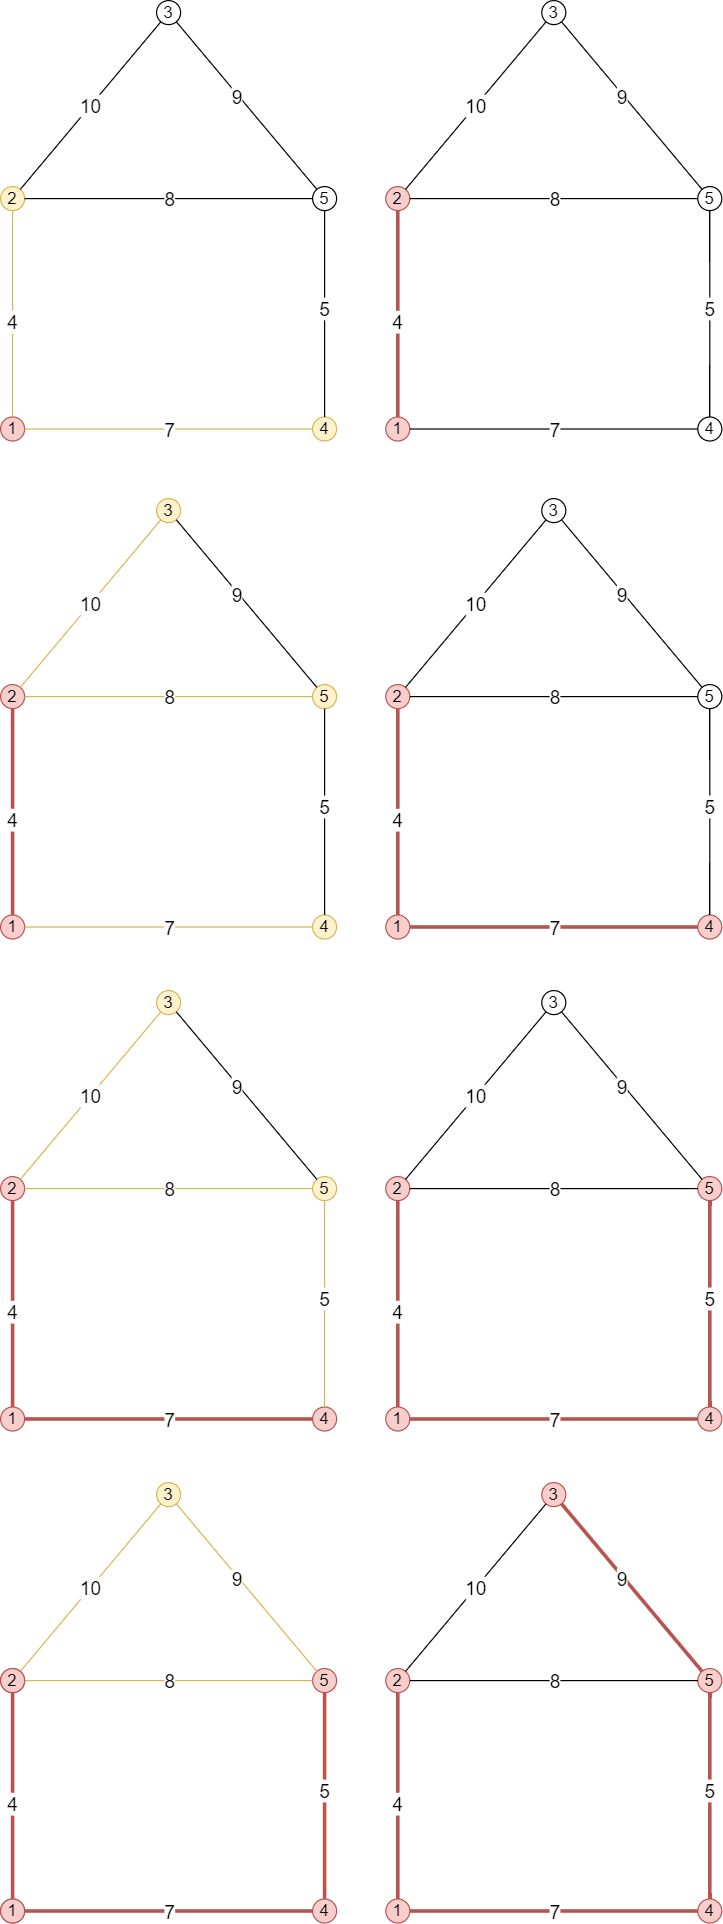


## Реализация

In [1]:
# Алгоритм Прима поиска минимального остова графа

# поиск минимального веса ребра
def get_min(R, V):
    edge_m = (9999999999, -1, -1) # выбранное минимальное ребро с вершинами
    # обход по всем вершинам, уже входящим в остов
    for v in V:

        # текущее минимальное ребро для конкретной вершины v
        edge_cur = min(R, key=lambda x: x[0] if (x[1] == v or x[2] == v) and (x[1] not in V or x[2] not in V) else 9999999999)
        
        # сравнение выбранного минимального с текущим, обновление минимального
        if edge_m[0] > edge_cur[0]:
            edge_m = edge_cur

    return edge_m


def algPrima():
    # список ребер графа (длина, вершина 1, вершина 2)
    # первое значение возвращается, если нет минимальных ребер
    R = [(9999999999, -1, -1), (13, 1, 2), (18, 1, 3), (17, 1, 4), (15, 1, 5), (21, 1, 6),
         (26, 2, 3), (19, 2, 5), (30, 3, 4), (22, 4, 6)]

    N = 6  # число вершин в графе
    V = {1}  # множество соединенных вершин
    MST = []  # список ребер остова
    cost = 0  # общая стоимость

    while len(V) < N:
        r = get_min(R, V)  # ребро с минимальным весом
        if r[0] == 9999999999:  # если ребер нет, то остов построен
            break

        MST.append(r)  # добавляем ребро в остов
        cost = cost + r[0]  # наращиваем общую стоимость остова
        V.add(r[1])  # добавляем вершины в множество U
        V.add(r[2])

    print(MST)
    print("Cost = ", str(cost))

algPrima()

[(13, 1, 2), (15, 1, 5), (17, 1, 4), (18, 1, 3), (21, 1, 6)]
Cost =  84


Наибольший интерес вызывает строка:

```
# текущее минимальное ребро для конкретной вершины v
edge_cur = min(R, key=lambda x: x[0] if (x[1] == v or x[2] == v) and (x[1] not in V or x[2] not in V) else 9999999999)
```
Разберем ее.


> **Синтаксис:**
> 
> Функция ***min(iterable, *[, key, default])*** возвращает минимальное значение элемента из итерируемого объекта.
> 
> **Параметры:**
>
> ***iterable*** - итерируемый объект,
>
>***key*** - функция сортировки (смотри list.sort()),
>
>***default*** - значение по умолчанию, если итерируемый объект окажется пустым.


В нашем случае ***R*** - это итерируемый объект, содержащий в себе список кортежей ребер, например, (13, 1, 2). 
<br/><br/>
Функция ***key=lambda x: x[0] if (x[1] == v or x[2] == v) and (x[1] not in V or x[2] not in V) else 9999999999*** применяется к каждому элементу списка ***R***, преобразует эти элементы, и потом функция ***min*** сравнивает уже новые элементы.
<br/><br/>
***lambda*** - это анонимная функция, которая выполняет только одно выражение и возвращает результат своего вычисления. В нашем случае она возвращает значение ***x[0] - вес ребра*** , если выполняется условие ***(x[1] == v or x[2] == v) and (x[1] not in V or x[2] not in V)*** , которое означает что одна из вершин входит в остов, а вторая не входит, или возвращает очень большое значение, если предыдущее условие не выполняется.
<br/><br/>
После того, как функция ***min*** получит все значения от ***lambda*** , она находит минимум и сохраняет его в переменную ***edge_cur***.

Потом происходит сравнение уже выбранного минимума ***edge_m*** с ***edge_cur*** , если последнее меньше, то минимум обновляется.


**Графический пример выполнения алгоритма**


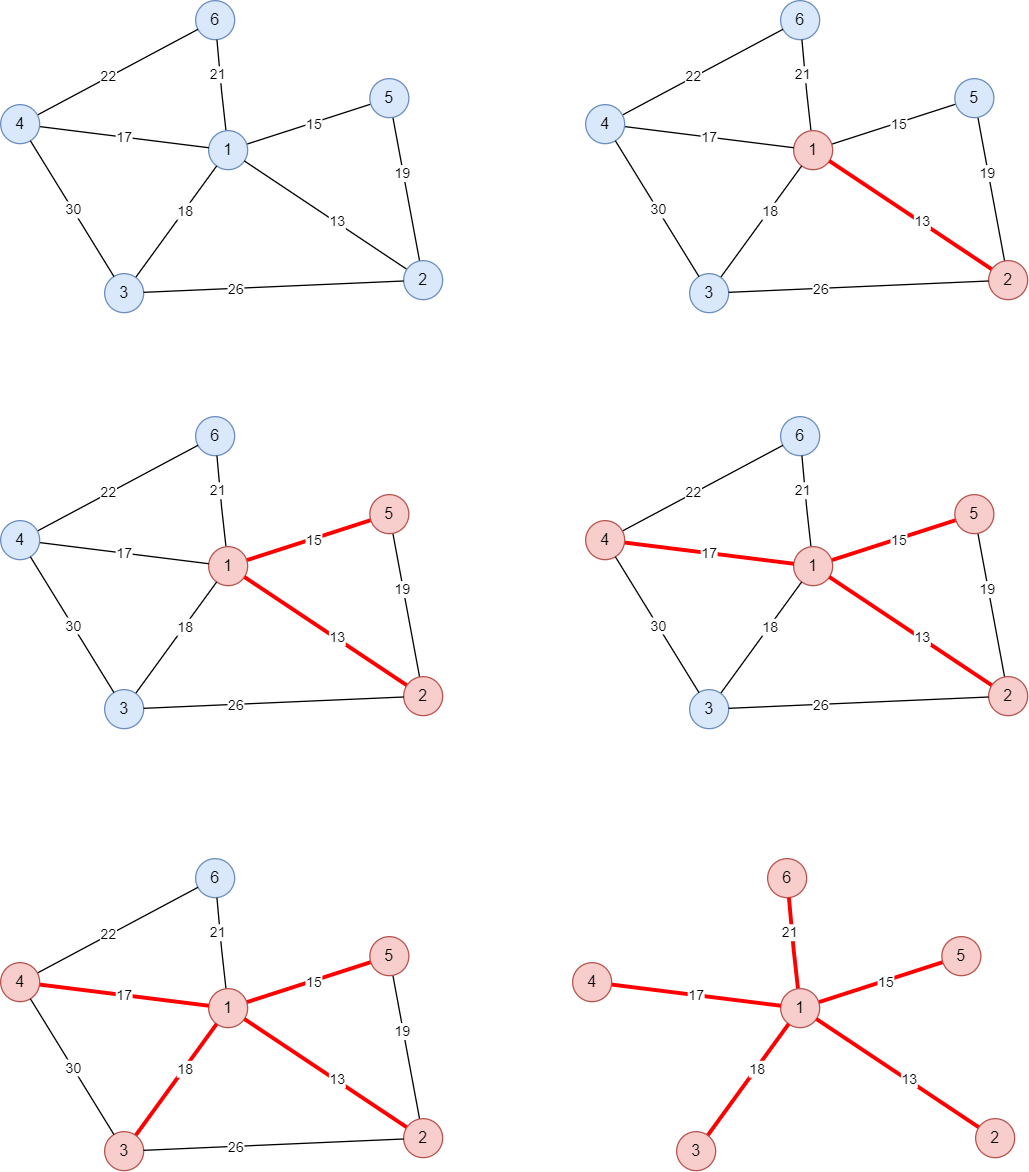

## Производительность

Основной объём вычислений в алгоритме Прима приходится на поддержание набора рёбер, выходящих из текущего фрагмента. Необходимо добавлять новые рёбра или вершины в набор, и находить ребро с наименьшим весом. При использовании списков вершин сложность O(n^2).

Скорость вычислений для настоящего примера составляет 20-28 ms на LeetCode.

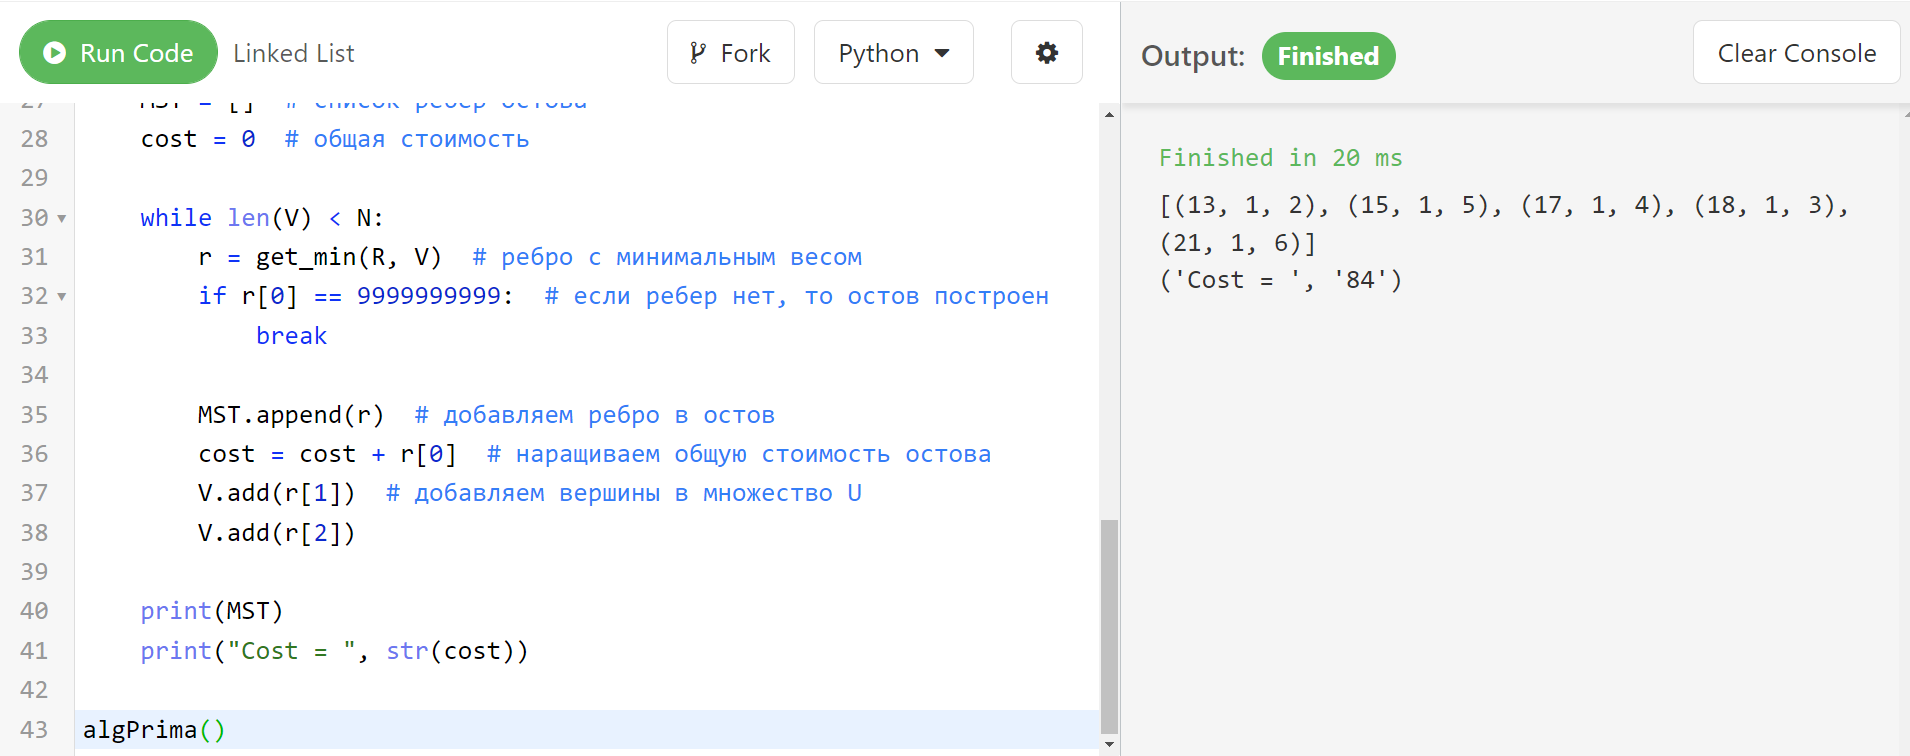